In [1]:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import numpy.random as nr
    import math
    
    %matplotlib inline

In [2]:
     customer_info = pd.read_csv('AdvWorksCusts.csv')
     customer_spending = pd.read_csv('AW_AveMonthSpend.csv')
     customer_has_bike=pd.read_csv('AW_BikeBuyer.csv')

In [3]:
    # remove duplicates\n",
    print(customer_info.shape)
    print(customer_info.CustomerID.unique().shape)
    customer_info.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True),
    print(customer_info.shape)
    print(customer_info.CustomerID.unique().shape)

(16519, 23)
(16404,)
(16404, 23)
(16404,)


In [4]:
    print(customer_spending.shape)
    print(customer_spending.CustomerID.unique().shape)
    customer_spending.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True),
    print(customer_spending.shape)
    print(customer_spending.CustomerID.unique().shape)

(16519, 2)
(16404,)
(16404, 2)
(16404,)


In [5]:
    print(customer_has_bike.shape)
    print(customer_has_bike.CustomerID.unique().shape)
    customer_has_bike.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
    print(customer_has_bike.shape)
    print(customer_has_bike.CustomerID.unique().shape)

(16519, 2)
(16404,)
(16404, 2)
(16404,)


In [6]:
    # check for missing values
    (customer_has_bike.astype(np.object).isnull()).any()

CustomerID    False
BikeBuyer     False
dtype: bool

In [7]:
(customer_spending.astype(np.object).isnull()).any()

CustomerID       False
AveMonthSpend    False
dtype: bool

In [8]:
(customer_info.astype(np.object).isnull()).any()

CustomerID              False
Title                    True
FirstName               False
MiddleName               True
LastName                False
Suffix                   True
AddressLine1            False
AddressLine2             True
City                    False
StateProvinceName       False
CountryRegionName       False
PostalCode              False
PhoneNumber             False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
dtype: bool

In [9]:
#Data is cleaned and fine with missing values check. Will now perform exploratory data analysis
customer_info.describe()


,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78129.672397
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39728.383493
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47808.750000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105211.750000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000


In [10]:
customer_spending.describe()


,CustomerID,AveMonthSpend
count,16404.000000,16404.000000
mean,20240.143136,72.391002
std,5340.370705,27.269921
min,11000.000000,22.000000
25%,15617.750000,52.000000
50%,20231.500000,68.000000
75%,24862.250000,84.000000
max,29482.000000,176.000000


In [11]:
customer_has_bike.describe()

,CustomerID,BikeBuyer
count,16404.000000,16404.000000
mean,20240.143136,0.332541
std,5340.370705,0.471138
min,11000.000000,0.000000
25%,15617.750000,0.000000
50%,20231.500000,0.000000
75%,24862.250000,1.000000
max,29482.000000,1.000000


In [12]:
    #Merge data for analysis. We will like to predict customer average monthly spend hence this is the label in question.
    combined = customer_info
    combined = customer_info.merge(customer_spending, on='CustomerID', how='left')
    combined.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,86688,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,92771,95


In [13]:
 # generate Age column since we are given birthdate
from datetime import datetime
from dateutil.parser import parse 

def generate_age(customer_info, format):
    collection_day = birthday = datetime(1998, 1, 1, 0, 0, 0)
    age = []
    for index, row in customer_info.iterrows():
        conv = datetime.strptime(row['BirthDate'], format)
        age.append(int((collection_day - conv).days/365))
    return age

In [14]:
combined['Age'] = generate_age(combined, '%Y-%m-%d')

In [15]:
combined[['BirthDate','Age']].head()

,BirthDate,Age
0,1966-04-08,31
1,1965-05-14,32
2,1965-08-12,32
3,1968-02-15,29
4,1968-08-08,29


In [16]:
def plot_scatter(auto_prices, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        auto_prices.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


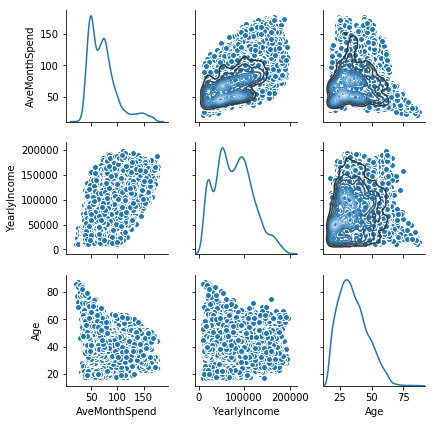

In [17]:
cols = ['AveMonthSpend','YearlyIncome','Age']
sns.pairplot(combined[cols],  palette="Set2", diag_kind="kde", size=2).map_upper(sns.kdeplot, cmap="Blues_d")

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


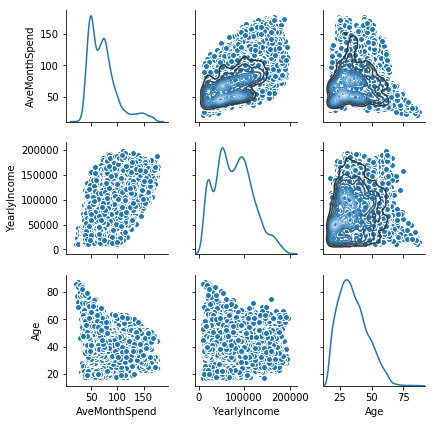

In [18]:
cols = ['AveMonthSpend','YearlyIncome','Age']
sns.pairplot(combined[cols],  palette="Set2", diag_kind="kde", size=2).map_upper(sns.kdeplot, cmap="Blues_d")

In [19]:
def plot_box(auto_prices, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=auto_prices)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

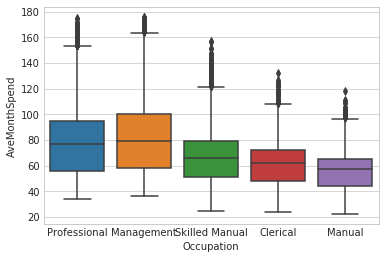

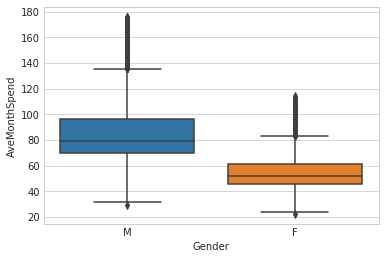

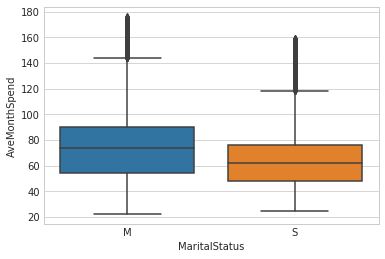

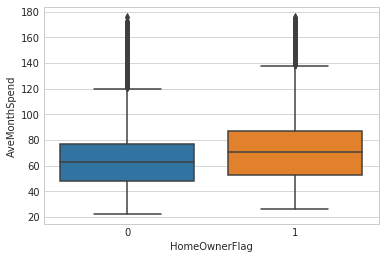

In [20]:
cols = ['Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag']
plot_box(combined, cols)

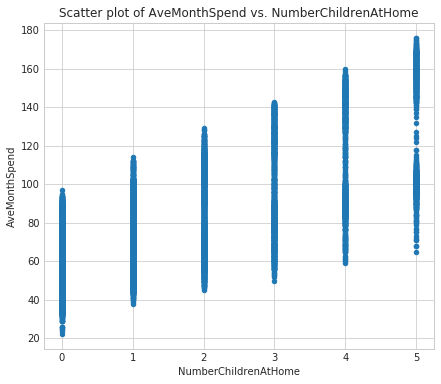

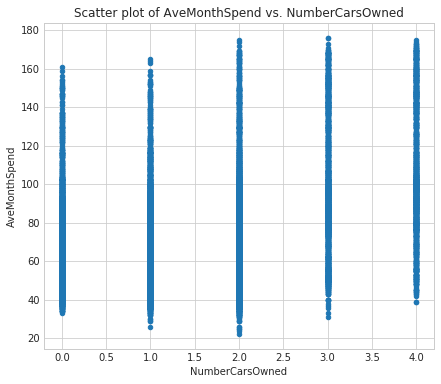

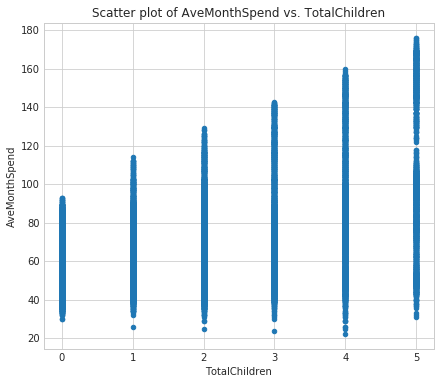

In [21]:
plot_scatter(combined, ['NumberChildrenAtHome', 'NumberCarsOwned', 'TotalChildren'])

In [22]:
categorical_features = ['Gender','MaritalStatus','HomeOwnerFlag', 'Occupation']
numeric_features = ['Age', 'YearlyIncome','NumberChildrenAtHome']

In [23]:
# define encoder for categorical variables
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

def encode_string(cat_features):
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

In [24]:
def encode_cat_features(features):
    categorical_features = ['Gender','MaritalStatus','HomeOwnerFlag']
    f = encode_string(features['Occupation'])
    for cat in categorical_features:
        enc = encode_string(features[cat])
        f = np.concatenate([f,enc],1)
    return f

In [25]:
labels = np.array(combined.AveMonthSpend)
print(labels)

[ 89 117 123 ...  79  65  68]


In [26]:
selected = numeric_features + categorical_features
features = combined[selected]
features.head()

,Age,YearlyIncome,NumberChildrenAtHome,Gender,MaritalStatus,HomeOwnerFlag,Occupation
0,31,137947,0,M,M,1,Professional
1,32,101141,3,M,S,0,Professional
2,32,91945,3,M,M,1,Professional
3,29,86688,0,F,S,0,Professional
4,29,92771,5,F,S,1,Professional


In [27]:
encoded = encode_cat_features(features)
encoded[:,:]

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [28]:
numeric_features = np.array(combined[numeric_features])
numeric_features[:,:]

array([[    31, 137947,      0],
       [    32, 101141,      3],
       [    32,  91945,      3],
       ...,
       [    58, 133053,      0],
       [    51,  31930,      0],
       [    52,  59382,      0]])

In [29]:
features = np.concatenate([encoded,numeric_features], 1)
print(features.shape)
print(features[:1,:14])

(16404, 14)
[[0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 3.10000e+01
  1.37947e+05 0.00000e+00]]


In [30]:
# Time to split and train
nr.seed(9988)
indx = range(features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = features[indx[1],:]
y_test = np.ravel(labels[indx[1]])
X_train[:2,11:13]

array([[3.50000e+01, 3.97160e+04],
       [3.00000e+01, 1.72468e+05]])

In [31]:
# Time to scale, this would most especially be useful in yearly income
scaler = preprocessing.StandardScaler().fit(X_train[:,11:13])
X_train[:,11:13] = scaler.transform(X_train[:,11:13])
X_test[:,11:13] = scaler.transform(X_test[:,11:13])
X_train[:2]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        , -0.04218537, -0.96803832,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
         0.        , -0.48707941,  2.37320265,  0.        ]])

In [32]:
## define and fit the linear regression model
lin_mod = linear_model.Ridge(alpha = 0.04)
lin_mod.fit(X_train, y_train)
print(lin_mod.intercept_)
print(lin_mod.coef_)

60.843703216654745
[ 6.62462761e-01 -2.17174554e+00 -1.79238399e-01  8.84109488e-01
  8.04411686e-01 -1.40857877e+01  1.40857877e+01  3.09843700e+00
 -3.09843700e+00  3.72134827e-03 -3.72134825e-03 -1.24172121e+00
  8.20153712e+00  1.10719328e+01]


In [33]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(X_test) 
print_metrics(y_test, y_score, 14)

Mean Square Error      = 34.30367552619289
Root Mean Square Error = 5.856933969765485
Mean Absolute Error    = 4.394899323287182
Median Absolute Error  = 3.3929838614619534
R^2                    = 0.9522625203159063
Adjusted R^2           = 0.9500926348757203


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


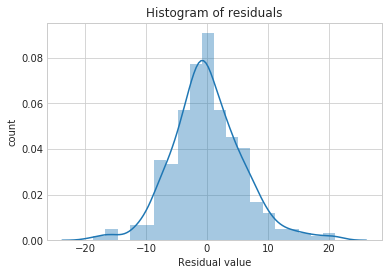

In [34]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)

In [35]:
print(y_test[14])
print(y_score[14])
start = indx[1][14] -1
print(combined[start:indx[1][14]])

51
44.37961271472424
       CustomerID Title FirstName MiddleName LastName Suffix  \
10653       14328   NaN    Andrea          L   Rogers    NaN   

           AddressLine1 AddressLine2     City StateProvinceName ...   \
10653  9669 Cynthia Dr.          NaN  Shawnee  British Columbia ...    

           Occupation Gender MaritalStatus HomeOwnerFlag NumberCarsOwned  \
10653  Skilled Manual      F             S             0               2   

      NumberChildrenAtHome TotalChildren YearlyIncome  AveMonthSpend  Age  
10653                    0             0        51443             43   21  

[1 rows x 25 columns]


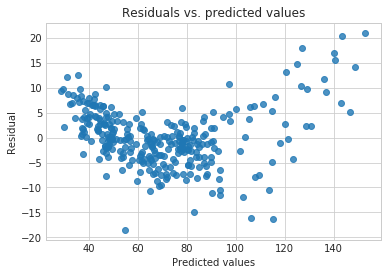

In [36]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
resid_plot(y_test, y_score)

In [44]:
# trying polynomial regression 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model = make_pipeline(PolynomialFeatures(4),
                           linear_model.LinearRegression())
poly_model.fit(X_train,y_train)
scores = poly_model.predict(X_test) 
print_metrics(y_test, scores, 14)

Mean Square Error      = 8.00402767629444
Root Mean Square Error = 2.8291390344580876
Mean Absolute Error    = 2.288715305328369
Median Absolute Error  = 2.0523624420166016
R^2                    = 0.9888614819628795
Adjusted R^2           = 0.9883551856884649


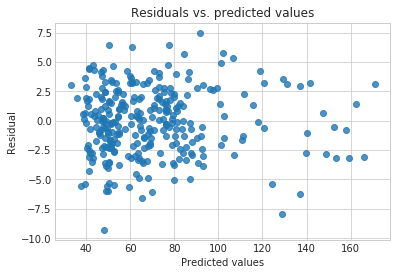

In [45]:
resid_plot(y_test, scores)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


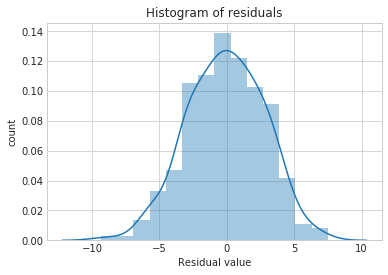

In [46]:
hist_resids(y_test, scores)

In [47]:
print(y_test)
print(scores)

[ 88  47  47 101  79  47  74  76  32  49  44  65  61  48  51  76  64  51
  99  58  54  51  51  86 121  49 148 137  55  40  56  77  61  68  77  57
  48 164  48 112  37  90  46  90  69  57  74  61  52  99  87  75  39 102
  63  48  76  54  77  60  70  48  59 103 163  64  82  59  46  50  90  71
  55  57  62  43  45  49  59  50  70  77  85  43  77  66  56  43  47  60
  66  49  40  39  64 146  46  45  63  82  81  49  74  59  45  81  48 109
  48  72  66  67  82 150 114  64  55  49  39  79  75  85  81  50  83  67
  80  45 174  52  66  51 133  51  89  45  47 145  39  49  57  72  80  78
 120  78  80  57  80  79  51 131  90  91  45  71  44  42  41  43  43  51
  92  40  59 118  52  75  82  50  63  83  49  50  93  77  46  39  54  64
  78  36  39  83  68  72  53  49  47  64  67 123  71  67  47  83  70  84
  58  87  49  44  43  64  76  75  78 106  76  99  63  59  42  81  45  67
  75  52  57  56  91  42  44  38 134  52  38  38  45 152 100  57  48  64
  58  77  79 157  84  53  73  82  51  64  51  76 10

In [48]:
# trying Neural network 
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=(100,),  
                                    activation='logistic',
                                       learning_rate='adaptive',
                                       max_iter=1000,
                                       learning_rate_init=0.001)
regressor.fit(X_train,y_train)
scores = regressor.predict(X_test)
print_metrics(y_test, scores, 14)

Mean Square Error      = 8.438151733013832
Root Mean Square Error = 2.9048496919830176
Mean Absolute Error    = 2.3578215412827035
Median Absolute Error  = 2.238707414063544
R^2                    = 0.9882573487899723
Adjusted R^2           = 0.9877235919167893


In [49]:
# trying Random Forest
from sklearn.ensemble import RandomForestRegressor
rand_regressor = RandomForestRegressor(n_estimators=40)
rand_regressor.fit(X_train, y_train)
scores = rand_regressor.predict(X_test)
print_metrics(y_test, scores, 14)

Mean Square Error      = 11.884481249999999
Root Mean Square Error = 3.4473875978775577
Mean Absolute Error    = 2.79125
Median Absolute Error  = 2.462500000000002
R^2                    = 0.9834613879263557
Adjusted R^2           = 0.9827096328320992


In [52]:
# test on final test data
# import final test data
final = pd.read_csv('AW_test.csv')
print(final.shape)
print(final.CustomerID.unique().shape)

(500, 23)
(500,)


In [53]:
final['Age'] = generate_age(final,'%m/%d/%Y')
final[['Age','BirthDate']].head()

,Age,BirthDate
0,53,1/5/1945
1,33,10/4/1964
2,64,1/12/1934
3,39,9/22/1958
4,32,3/19/1965


In [54]:
encoded = encode_cat_features(final)
encoded[:,:]

array([[0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [55]:
numeric_final_features = np.array(final[['Age','YearlyIncome', 'NumberChildrenAtHome']])
numeric_final_features[:1,:]

array([[   53, 86931,     0]])

In [56]:
final_test = np.concatenate([encoded,numeric_final_features], 1)
final_test[:,11:13]= scaler.transform(final_test[:,11:13])
final_test[:3,:14]

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  1.55943317,  0.2203181 ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        , -0.22014298,  0.55239847,  2.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  2.53820005,  0.64955098,  0.        ]])

In [57]:
final_reg_scores = rand_regressor.predict(final_test)
np.savetxt('final_regression_answers.csv', final_reg_scores, delimiter=',',fmt='%i')